## Holt-winters

In [1]:
import pandas as pd
import datetime
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [2]:
df = pd.read_excel('Time series jason brownlee.xlsx')
df.set_index('Timestamp',inplace=True)
df = df.rename(columns={'BAIRRO ALTO -  / FREQ B1': 'FREQUENCIA BOMBA 1', 'BAIRRO ALTO -  / FREQ B2': 'FREQUENCIA BOMBA 2','BAIRRO ALTO -  / FREQ B3':'FREQUENCIA BOMBA 3','BAIRRO ALTO - LT01 / NÍVEL':'NIVEL DO RESERVATÓRIO - LT01','BAIRRO ALTO - FT01 / ENT IRAI':'VAZÃO DE ENTRADA- FT01','BAIRRO ALTO - FT02 / GBAL':'VAZÃO DE GRAVIDADE - FT02','BAIRRO ALTO - FT03 / RBAL':'VAZÃO DE RECALQUE - FT03','BAIRRO ALTO - PT01 / SUCÇÃO':'PRESSÃO DE SUCÇÃO - PT01','BAIRRO ALTO - PT02 / RBAL':'PRESSÃO DE RECALQUE - PT02'})
df.replace(to_replace='Bad', value=np.nan, inplace=True)
df.interpolate(inplace=True)
df = df.resample('24H').mean().reset_index()

In [3]:
df.set_index('Timestamp',inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02
Timestamp,,,,,,,,,
2018-01-01,45.727617,0.916126,0.000000,4.085868,164.094190,96.566326,78.387204,5.195563,16.064507
2018-01-02,47.239316,0.000000,0.000000,3.942272,181.728099,112.688852,84.923583,5.017492,15.573998
2018-01-03,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076
2018-01-04,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601
2018-01-05,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912


In [4]:
# definindo 1 passo à frente
test_size = int(df.shape[0] * 0.3)
lags = 3
steps_ahead1 = 1
# fazer um for do steps_ahead
#for steps_ahead in [1,7,14,30]:
   # todo o código abaixo nessa região

In [5]:
# o próximo passo pode ser influenciado por demais passos atrás
colunas = df.columns

for lag in range(1, lags):
    for column in colunas:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [6]:
# vou usar dados de 1 passo atrás para prever 1 passo à frente
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead1)

In [7]:
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2,FREQUENCIA BOMBA 2_t-2,FREQUENCIA BOMBA 3_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2,VAZÃO DE ENTRADA- FT01_t-2,VAZÃO DE GRAVIDADE - FT02_t-2,VAZÃO DE RECALQUE - FT03_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2,PRESSÃO DE RECALQUE - PT02_t-2,y
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-03,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076,47.239316,...,45.727617,0.916126,0.000000,4.085868,164.094190,96.566326,78.387204,5.195563,16.064507,3.912685
2018-01-04,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601,48.112157,...,47.239316,0.000000,0.000000,3.942272,181.728099,112.688852,84.923583,5.017492,15.573998,3.389542
2018-01-05,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912,49.869415,...,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076,3.787355
2018-01-06,52.575690,0.000000,18.076194,3.787355,209.129580,107.606394,93.396580,4.823002,20.695101,37.037886,...,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601,4.002495
2018-01-07,48.340235,0.000000,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,52.575690,...,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912,3.945957


In [8]:
# definindo dados de treino e teste
df_train = df.iloc[:-test_size, :]
df_test = df.iloc[-test_size:, :]

In [9]:
train_size=int(df.shape[0] - test_size)
df_train=df.head(train_size)
df_test=df.tail(test_size)

In [10]:
X_train = df_train.drop(['y'], axis=1)
y_train = df_train['y']
X_test = df_test.drop(['y'], axis=1)
y_test = df_test['y']

In [11]:
y_hat = []
y_train_aux=y_train
for i in range(y_test.shape[0]):
    holt1 = ExponentialSmoothing(y_train_aux, trend='add', seasonal='mul').fit()
    y_hat_aux = holt1.forecast(steps_ahead1)[-1]
    y_hat.append(y_hat_aux)
    y_train_aux = y_train.append(y_test.iloc[:i])

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

In [12]:
len(y_hat)

328

In [13]:
y_test.shape[0]

328

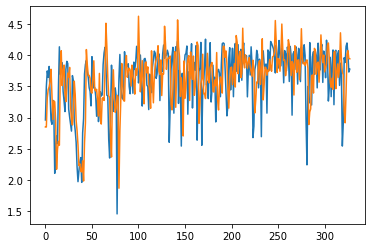

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_test.values, label='y_test')
plt.plot(y_hat, label='y_hat')

In [15]:
holt11 = ExponentialSmoothing(endog=y_train).fit()

y_hat_train = holt11.predict(start=0,end=(y_train.shape[0]-1))

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [16]:
y_hat_train.dropna(axis=0, inplace=True)

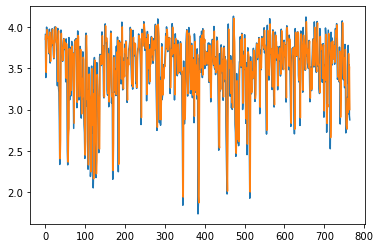

In [17]:
import matplotlib.pyplot as plt
plt.plot(y_train.values, label='y_train')
plt.plot(y_hat_train.values, label='y_hat')

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score

In [19]:
y_train.shape

(765,)

In [20]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat)
rmse_train=np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test=np.sqrt(mean_squared_error(y_test, y_hat))
mae_train=mean_absolute_error(y_train, y_hat_train)
mae_test=mean_absolute_error(y_test, y_hat)
mape_train = int((np.mean(np.abs((y_train - y_hat_train) / y_train)) * 100))
mape_test = int((np.mean(np.abs((y_test - y_hat) / y_test)) * 100))
r2_train = r2_score(y_train, y_hat_train)
r2_test = r2_score(y_test, y_hat)

In [21]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train, mse_test))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train, mape_test))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train, mae_test))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train, rmse_test))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train, r2_test))

MSE train: 0.134, MSE test: 0.281
MAPE train: 8.000, MAPE test: 12.000
MAE train: 0.269, MAE test: 0.417
RMSE train: 0.366, RMSE test: 0.530
R2 train: 0.195, R2 test: -0.171


In [22]:
## 7 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead7 = 7
lags = 3

In [23]:
colunas7 = df.columns

for lag in range(1, lags):
    for column in colunas7:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [24]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead7)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2,y_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-07,48.340235,0.000000,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,52.575690,...,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076,3.787355
2018-01-08,49.139040,0.000000,1.882809,3.945957,163.036853,100.778530,83.851865,5.044049,17.733694,48.340235,...,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601,4.002495
2018-01-09,49.933460,0.000000,0.000000,3.875856,187.854675,100.264018,85.714187,4.958287,17.919003,49.139040,...,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912,3.945957
2018-01-10,50.077934,0.000000,0.000000,3.885556,172.007514,100.854453,85.651196,4.971008,18.197270,49.933460,...,52.575690,0.000000,18.076194,3.787355,209.129580,107.606394,93.396580,4.823002,20.695101,3.875856
2018-01-11,50.548359,2.598346,0.000000,3.859009,182.693751,105.711830,87.362147,4.929503,18.342447,50.077934,...,48.340235,0.000000,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,3.885556


In [25]:
df_train7 = df.iloc[:-test_size, :]
df_test7 = df.iloc[-test_size:, :]

In [26]:
X_train7 = df_train7.drop(['y'], axis=1)
y_train7 = df_train7['y']
X_test7 = df_test7.drop(['y'], axis=1)
y_test7 = df_test7['y']

In [27]:
y_hat7 = []
for i in range(y_test7.shape[0]):
    holt7=ExponentialSmoothing(y_train_aux, trend='add', seasonal='mul').fit()
    y_hat_aux7 = holt7.forecast(steps_ahead7)[0]
    y_hat7.append(y_hat_aux7)
    y_train_aux7 = y_train7.append(y_test7.iloc[:i])

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

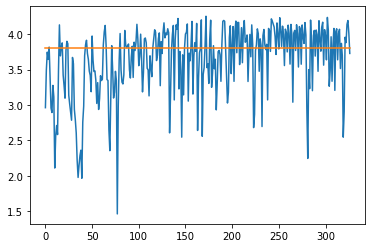

In [28]:
plt.plot(y_test7.values, label='y_test')
plt.plot(y_hat7, label='y_hat')

In [29]:
holt77 = ExponentialSmoothing(endog=y_train).fit()

y_hat_train7 = holt77.predict(steps_ahead7+3)

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


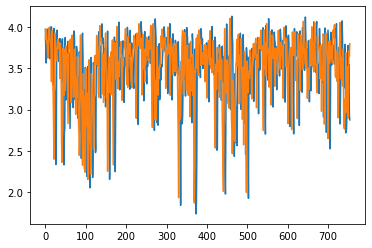

In [30]:
import matplotlib.pyplot as plt
plt.plot(y_train7.values, label='y_train')
plt.plot(y_hat_train7.values, label='y_hat')

In [31]:
mse_train7 = mean_squared_error(y_train7, y_hat_train7)
mse_test7 = mean_squared_error(y_test7, y_hat7)
rmse_train7=np.sqrt(mean_squared_error(y_train7, y_hat_train7))
rmse_test7=np.sqrt(mean_squared_error(y_test7, y_hat7))
mae_train7=mean_absolute_error(y_train7, y_hat_train7)
mae_test7=mean_absolute_error(y_test7, y_hat7)
mape_train7 = int((np.mean(np.abs((y_train7 - y_hat_train7) / y_train7)) * 100))
mape_test7 = int((np.mean(np.abs((y_test7 - y_hat7) / y_test7)) * 100))
r2_train7 = r2_score(y_train7, y_hat_train7)
r2_test7 = r2_score(y_test7, y_hat7)

In [32]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train7, mse_test7))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train7, mape_test7))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train7, mae_test7))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train7, rmse_test7))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train7, r2_test7))

MSE train: 0.303, MSE test: 0.271
MAPE train: 8.000, MAPE test: 12.000
MAE train: 0.414, MAE test: 0.372
RMSE train: 0.550, RMSE test: 0.521
R2 train: -0.815, R2 test: -0.126


In [33]:
# 14 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead14 = 14
lags = 3

In [34]:
colunas14 = df.columns

for lag in range(1, lags):
    for column in colunas14:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [35]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead14)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2_t-2,y_t-2_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-13,44.869252,16.259560,7.994524,3.678212,215.962627,112.833196,98.166977,4.683880,20.737078,48.393622,...,48.340235,0.000000,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,3.566121
2018-01-14,49.763465,2.598699,0.000000,3.977175,195.886968,104.610384,88.413023,5.038774,17.643447,44.869252,...,49.139040,0.000000,1.882809,3.945957,163.036853,100.778530,83.851865,5.044049,17.733694,3.778140
2018-01-15,48.867853,4.771558,11.838732,3.702056,163.559903,116.506405,95.038750,4.719867,18.042233,49.763465,...,49.933460,0.000000,0.000000,3.875856,187.854675,100.264018,85.714187,4.958287,17.919003,3.772506
2018-01-16,51.331056,3.795404,5.442906,3.566121,223.713385,112.323628,91.578218,4.608474,18.040889,48.867853,...,50.077934,0.000000,0.000000,3.885556,172.007514,100.854453,85.651196,4.971008,18.197270,3.870653
2018-01-17,50.932379,3.358644,0.000000,3.778140,194.771581,109.232258,90.726766,4.821182,18.003441,51.331056,...,50.548359,2.598346,0.000000,3.859009,182.693751,105.711830,87.362147,4.929503,18.342447,3.936033


In [36]:
df_train14 = df.iloc[:-test_size, :]
df_test14 = df.iloc[-test_size:, :]

In [37]:
X_train14 = df_train14.drop(['y'], axis=1)
y_train14 = df_train14['y']
X_test14 = df_test14.drop(['y'], axis=1)
y_test14 = df_test14['y']

In [38]:
y_hat14 = []
for i in range(y_test14.shape[0]):
    holt14=ExponentialSmoothing(y_train_aux, trend='add', seasonal='mul').fit()
    y_hat_aux14 = holt14.forecast(steps_ahead14)[0]
    y_hat14.append(y_hat_aux14)
    y_train_aux14 = y_train14.append(y_test14.iloc[:i])

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

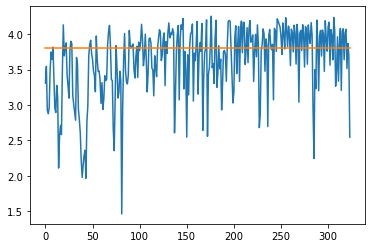

In [39]:
plt.plot(y_test14.values, label='y_test')
plt.plot(y_hat14, label='y_hat')

In [40]:
holt1414 = ExponentialSmoothing(endog=y_train).fit()

y_hat_train14 = holt1414.predict(steps_ahead14+13)

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


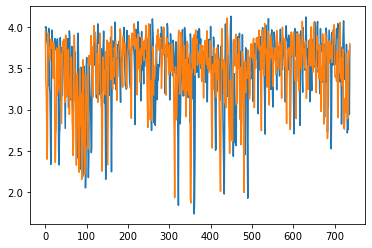

In [41]:
import matplotlib.pyplot as plt
plt.plot(y_train14.values, label='y_train')
plt.plot(y_hat_train14.values, label='y_hat')

In [42]:
mse_train14 = mean_squared_error(y_train14, y_hat_train14)
mse_test14 = mean_squared_error(y_test14, y_hat14)
rmse_train14=np.sqrt(mean_squared_error(y_train14, y_hat_train14))
rmse_test14=np.sqrt(mean_squared_error(y_test14, y_hat14))
mae_train14=mean_absolute_error(y_train14, y_hat_train14)
mae_test14=mean_absolute_error(y_test14, y_hat14)
mape_train14 = int((np.mean(np.abs((y_train14 - y_hat_train14) / y_train14)) * 100))
mape_test14 = int((np.mean(np.abs((y_test14 - y_hat14) / y_test14)) * 100))
r2_train14 = r2_score(y_train14, y_hat_train14)
r2_test14 = r2_score(y_test14, y_hat14)

In [43]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train14, mse_test14))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train14, mape_test14))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train14, mae_test14))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train14, rmse_test14))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train14, r2_test14))

MSE train: 0.291, MSE test: 0.276
MAPE train: 11.000, MAPE test: 12.000
MAE train: 0.404, MAE test: 0.376
RMSE train: 0.540, RMSE test: 0.525
R2 train: -0.735, R2 test: -0.141


In [44]:
## 30 passos à frente
test_size = int(df.shape[0] * 0.3)
steps_ahead30 = 30
lags = 3

In [45]:
colunas30 = df.columns

for lag in range(1, lags):
    for column in colunas30:
        df[column + '_t-' + str(lag)] = df[column].shift(lag)

In [46]:
df['y'] = df['NIVEL DO RESERVATÓRIO - LT01'].shift(-steps_ahead30)
df.dropna(axis=0, inplace=True)
df.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2_t-2_t-2,y_t-2_t-2_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-21,29.573640,24.748148,0.0,3.983430,189.340984,106.320532,88.947033,5.047597,18.318277,43.489590,...,44.869252,16.259560,7.994524,3.678212,215.962627,112.833196,98.166977,4.683880,20.737078,4.005258
2018-01-22,51.440131,3.617004,0.0,3.782806,184.382696,121.318919,94.010509,4.804765,17.811635,29.573640,...,49.763465,2.598699,0.000000,3.977175,195.886968,104.610384,88.413023,5.038774,17.643447,3.862071
2018-01-23,51.270405,0.000000,0.0,3.837820,209.161684,116.911855,92.212891,4.872639,17.651701,51.440131,...,48.867853,4.771558,11.838732,3.702056,163.559903,116.506405,95.038750,4.719867,18.042233,3.815953
2018-01-24,51.233122,1.301844,0.0,3.675095,184.079912,115.605149,92.088689,4.708226,17.545691,51.270405,...,51.331056,3.795404,5.442906,3.566121,223.713385,112.323628,91.578218,4.608474,18.040889,3.806091
2018-01-25,50.799936,7.112454,0.0,3.617485,203.340317,110.325677,90.830999,4.668862,17.992582,51.233122,...,50.932379,3.358644,0.000000,3.778140,194.771581,109.232258,90.726766,4.821182,18.003441,3.709755


In [47]:
df_train30 = df.iloc[:-test_size, :]
df_test30 = df.iloc[-test_size:, :]

In [48]:
X_train30 = df_train30.drop(['y'], axis=1)
y_train30 = df_train30['y']
X_test30 = df_test30.drop(['y'], axis=1)
y_test30 = df_test30['y']

In [49]:
y_hat30 = []
for i in range(y_test30.shape[0]):
    holt30=ExponentialSmoothing(y_train_aux, trend='add', seasonal='mul').fit()
    y_hat_aux30 = holt30.forecast(steps_ahead30)[0]
    y_hat30.append(y_hat_aux30)
    y_train_aux30 = y_train30.append(y_test30.iloc[:i])


C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferre

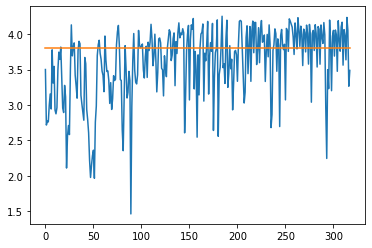

In [50]:
plt.plot(y_test30.values, label='y_test')
plt.plot(y_hat30, label='y_hat')

In [51]:
holt3030 = ExponentialSmoothing(endog=y_train).fit()

y_hat_train30 = holt3030.predict(steps_ahead30+29)

C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Python\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


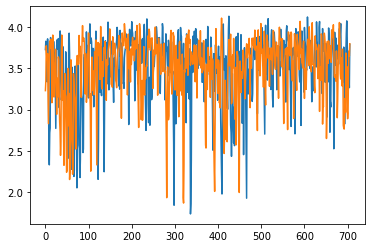

In [52]:
import matplotlib.pyplot as plt
plt.plot(y_train30.values, label='y_train')
plt.plot(y_hat_train30.values, label='y_hat_train')

In [53]:
mse_train30 = mean_squared_error(y_train30, y_hat_train30)
mse_test30 = mean_squared_error(y_test30, y_hat30)
rmse_train30=np.sqrt(mean_squared_error(y_train30, y_hat_train30))
rmse_test30=np.sqrt(mean_squared_error(y_test30, y_hat30))
mae_train30=mean_absolute_error(y_train30, y_hat_train30)
mae_test30=mean_absolute_error(y_test30, y_hat30)
mape_train30 = int((np.mean(np.abs((y_train30 - y_hat_train30) / y_train30)) * 100))
mape_test30 = int((np.mean(np.abs((y_test30- y_hat30) / y_test30)) * 100))
r2_train30 = r2_score(y_train30, y_hat_train30)
r2_test30 = r2_score(y_test30, y_hat30)

In [54]:
print('MSE train: %.3f, MSE test: %.3f' % (mse_train30, mse_test30))
print('MAPE train: %.3f, MAPE test: %.3f' % (mape_train30, mape_test30))
print('MAE train: %.3f, MAE test: %.3f' % (mae_train30, mae_test30))
print('RMSE train: %.3f, RMSE test: %.3f' % (rmse_train30, rmse_test30))
print('R2 train: %.3f, R2 test: %.3f' % (r2_train30, r2_test30))

MSE train: 0.321, MSE test: 0.289
MAPE train: 12.000, MAPE test: 12.000
MAE train: 0.424, MAE test: 0.388
RMSE train: 0.567, RMSE test: 0.538
R2 train: -0.946, R2 test: -0.164


In [55]:
df_train.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2,FREQUENCIA BOMBA 2_t-2,FREQUENCIA BOMBA 3_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2,VAZÃO DE ENTRADA- FT01_t-2,VAZÃO DE GRAVIDADE - FT02_t-2,VAZÃO DE RECALQUE - FT03_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2,PRESSÃO DE RECALQUE - PT02_t-2,y
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-03,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.885556
2018-01-04,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601,48.112157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.859009
2018-01-05,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912,49.869415,...,48.112157,0.000000,0.000000,3.883783,193.140774,113.665250,87.072110,4.949791,15.761076,3.746503
2018-01-06,52.575690,0.000000,18.076194,3.787355,209.129580,107.606394,93.396580,4.823002,20.695101,37.037886,...,49.869415,2.681982,0.000000,3.912685,184.679417,118.076269,90.388552,4.961430,16.897601,3.678212
2018-01-07,48.340235,0.000000,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,52.575690,...,37.037886,19.499752,8.569013,3.389542,211.898758,125.748680,91.432063,4.431274,17.123912,3.977175


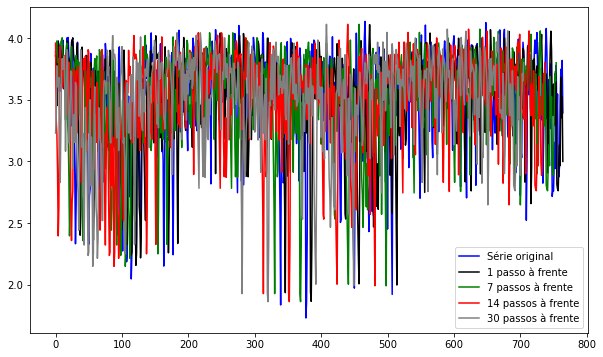

In [56]:
## Gráfico comparando o horizonte de previsão no Holt-Winters

plt.figure(figsize=(10,6))
plt.plot(y_train.values, label='y_train', color='blue')
plt.plot(y_hat_train.values, label='y_hat_train',color='black')
plt.plot(y_hat_train7.values, label='y_hat_train', color='green')
plt.plot(y_hat_train14.values, label='y_hat_train',color='red')
plt.plot(y_hat_train30.values, label='y_hat_train',color='grey')
plt.legend(['Série original','1 passo à frente','7 passos à frente','14 passos à frente','30 passos à frente'])

In [57]:
df_train7.head()

,FREQUENCIA BOMBA 1,FREQUENCIA BOMBA 2,FREQUENCIA BOMBA 3,NIVEL DO RESERVATÓRIO - LT01,VAZÃO DE ENTRADA- FT01,VAZÃO DE GRAVIDADE - FT02,VAZÃO DE RECALQUE - FT03,PRESSÃO DE SUCÇÃO - PT01,PRESSÃO DE RECALQUE - PT02,FREQUENCIA BOMBA 1_t-1,...,FREQUENCIA BOMBA 1_t-2_t-2,FREQUENCIA BOMBA 2_t-2_t-2,FREQUENCIA BOMBA 3_t-2_t-2,NIVEL DO RESERVATÓRIO - LT01_t-2_t-2,VAZÃO DE ENTRADA- FT01_t-2_t-2,VAZÃO DE GRAVIDADE - FT02_t-2_t-2,VAZÃO DE RECALQUE - FT03_t-2_t-2,PRESSÃO DE SUCÇÃO - PT01_t-2_t-2,PRESSÃO DE RECALQUE - PT02_t-2_t-2,y_t-2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-07,48.340235,0.000000,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,49.139040,0.000000,1.882809,3.945957,163.036853,100.778530,83.851865,5.044049,17.733694,48.340235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,49.933460,0.000000,0.000000,3.875856,187.854675,100.264018,85.714187,4.958287,17.919003,49.139040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.977175
2018-01-10,50.077934,0.000000,0.000000,3.885556,172.007514,100.854453,85.651196,4.971008,18.197270,49.933460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.702056
2018-01-11,50.548359,2.598346,0.000000,3.859009,182.693751,105.711830,87.362147,4.929503,18.342447,50.077934,...,48.340235,0.0,5.761071,4.002495,195.953294,94.778895,81.376922,5.109281,17.836842,3.566121


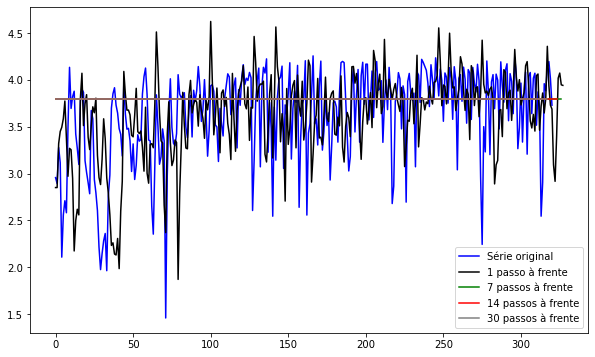

In [58]:
## Gráfico comparando o horizonte de previsão no Holt-Winters

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='y_train', color='blue')
plt.plot(y_hat, label='y_hat_train',color='black')
plt.plot(y_hat7, label='y_hat_train', color='green')
plt.plot(y_hat14, label='y_hat_train',color='red')
plt.plot(y_hat30, label='y_hat_train',color='grey')
plt.legend(['Série original','1 passo à frente','7 passos à frente','14 passos à frente','30 passos à frente'])